In [200]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import wordpunct_tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import tqdm
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [201]:
#put data into a dataframe, remove punctuation and uppercase
directory = r"C:\Users\Asus\PycharmProjects\nlpTask2\train_ready_for_WS.csv"
directory_test = r"C:\Users\Asus\PycharmProjects\nlpTask2\test.csv"
df = pd.read_csv(directory, sep=';')
df = df.drop(columns=['article_id'])
df_test = pd.read_csv(directory_test, sep=';')
df_test = df_test.drop(columns=['article_id'])
df

,essay,emotion
0,it is really diheartening to read about these ...,sadness
1,the phone lines from the suicide prevention li...,sadness
2,"no matter what your heritage, you should be ab...",neutral
3,it is frightening to learn about all these sha...,fear
4,the eldest generation of russians aren't being...,sadness
...,...,...
1855,"These days, women are winning in sports. There...",joy
1856,I hate ISIS. They are a group full of hate and...,anger
1857,This is just disgusting. I cannot believe that...,disgust
1858,I feel like the world is so corrupt that it no...,sadness


In [202]:
# Preprocessing

In [203]:
def clean_text(doc):
    """
    This function is used to clean the text data. It performs several operations to preprocess the text data.
    
    Parameters:
    doc (str): The text document that needs to be cleaned.

    Returns:
    doc (str): The cleaned text document.

    The steps involved in the cleaning process are:
    1. Convert all characters to lowercase.
    2. Replace all punctuation with a space.
    3. Split the text into tokens (words) using white space as a delimiter.
    4. Remove tokens that are not alphabetic.
    5. Filter out English stop words.
    6. Filter out short tokens (length <= 1).
    7. Join the tokens back into a single string with spaces in between.
    """
    doc = doc.lower()

    # Replace all punctuation with a space
    for char in string.punctuation:
        doc = doc.replace(char, ' ')

    # Split the text into tokens (words) using white space as a delimiter
    tokens = doc.split()

    # Remove tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]

    # Filter out English stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]

    # Filter out short tokens (length <= 1)
    tokens = [word for word in tokens if len(word) > 1]

    # Join the tokens back into a single string with spaces in between
    doc = " ".join(tokens)

    return doc



In [204]:

def clean_df(df_new):
    """
    This function is used to clean the text data in a DataFrame. It applies the clean_text function to each text in the DataFrame.

    Parameters:
    df (DataFrame): The DataFrame that contains the text data that needs to be cleaned.

    Returns:
    cleaned_df (list): A list of cleaned text data.

    The steps involved in the cleaning process are:
    1. Initialize an empty list, cleaned_df.
    2. Iterate over each text in the 'text' column of the DataFrame.
    3. Apply the clean_text function to each text.
    4. Append the cleaned text to the cleaned_df list.
    5. Return the cleaned_df list.
    """

    # Initialize an empty list, cleaned_df
    cleaned_df = []

    # Iterate over each text in the 'text' column of the DataFrame
    for text in df_new['essay']:
        # Apply the clean_text function to each text
        clean = clean_text(text)

         # Append the cleaned text to the cleaned_df list
        cleaned_df.append(clean)

    # Return the cleaned_df list
    return cleaned_df

In [205]:
cleaned_df = df
cleaned_df['essay'] = df['essay'].apply(lambda x: clean_text(x))
cleaned_df_test = df_test
cleaned_df_test['essay'] = df_test['essay'].apply(lambda x: clean_text(x))

In [206]:
#split the training data into training and validation sets
train_x, val_x, train_y, val_y = train_test_split(cleaned_df['essay'], cleaned_df['emotion'], test_size=0.3, random_state=42)

val_x = val_x.reset_index(drop=True)
val_y = val_y.reset_index(drop=True)
train_x = train_x.reset_index(drop=True)
train_y = train_y.reset_index(drop=True)
print(train_x)
print(train_y)

0       iraq islamic state militants kidnapping thousa...
1       read article leprosy found squirrels kind scar...
2       hello feel bad yu death young already accompli...
3       article seems slightly sympathetic inmates say...
4       whole police violence blacks theme overplayed ...
                              ...                        
1297    gruesome moment help fact refugees face exhaus...
1298    lmao one told like public information insuranc...
1299    read article elephants becoming extinct due pe...
1300    think find precisely child years thing years s...
1301    global warming issue brewing time seems gettin...
Name: essay, Length: 1302, dtype: object
0          fear
1          fear
2       sadness
3         anger
4         anger
         ...   
1297    neutral
1298      anger
1299    sadness
1300      anger
1301    neutral
Name: emotion, Length: 1302, dtype: object


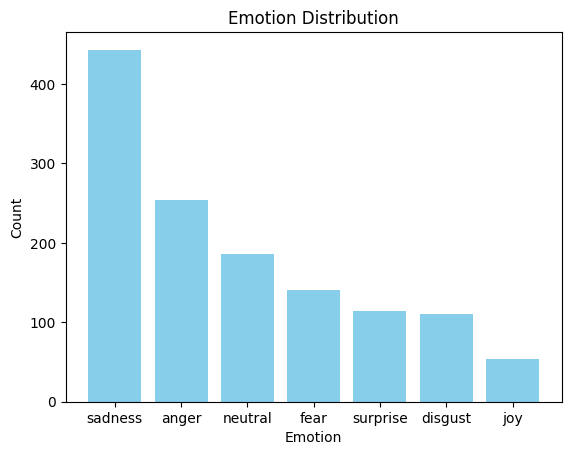

In [207]:
emotion_counts = train_y.value_counts()

plt.bar(emotion_counts.index, emotion_counts.values, color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Distribution')
plt.show()

In [208]:
# TF-IDF

In [218]:
train_corpus = train_x.tolist()
vectorizer = TfidfVectorizer(use_idf=True, max_features=900)
tf_idf_train_text = vectorizer.fit_transform(train_x).toarray()
#vectorizer.get_feature_names_out()
tf_idf_train_df = pd.DataFrame(tf_idf_train_text, columns=vectorizer.get_feature_names_out())
tf_idf_train_df = tf_idf_train_df.transpose()
print(tf_idf_train_df)

            0     1         2     3     4     5     6     7     8     9     \
able         0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
absolutely   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
abuse        0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
access       0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
accident     0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...          ...   ...       ...   ...   ...   ...   ...   ...   ...   ...   
yet          0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
young        0.0   0.0  0.259112   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
younger      0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
zika         0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
zoo          0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

            ...  1292      1293  1294  1295  1296      1297  12

In [219]:
test_corpus = df_test["essay"].tolist()
vectorizer_test = TfidfVectorizer(use_idf=True, max_features=900)
tf_idf_test_text = vectorizer_test.fit_transform(test_corpus).toarray()
tf_idf_test_df = pd.DataFrame(tf_idf_test_text, columns=vectorizer_test.get_feature_names_out())
tf_idf_test_df = tf_idf_test_df.transpose()
print(tf_idf_test_df)

            0         1    2    3    4    5    6       7    8         9    \
able        0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0000  0.0  0.142283   
absolutely  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0000  0.0  0.000000   
absurd      0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0000  0.0  0.000000   
abuse       0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0000  0.0  0.000000   
abused      0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0000  0.0  0.000000   
...         ...       ...  ...  ...  ...  ...  ...     ...  ...       ...   
year        0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0000  0.0  0.000000   
years       0.0  0.173723  0.0  0.0  0.0  0.0  0.0  0.0000  0.0  0.000000   
yes         0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0000  0.0  0.000000   
yet         0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.1469  0.0  0.000000   
young       0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0000  0.0  0.000000   

            ...  260  261       262  263  264  265  266  267  268  269  
ab